<a href="https://colab.research.google.com/github/buffolu/pytorch-tutorial-youtube-codemy.com-/blob/main/lesson4_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch

In [66]:
import torch.nn as nn
import torch.nn.functional as F


In [67]:
#Create a Model Class that inherits nn.Module

In [68]:
class Model(nn.Module):
   #input layer(4 features of flower) --> Hidden layer1(number of neurons)-->H2(n)-->output(3 class of iris flowres)

    def __init__(self,in_features = 4,h1 = 8,h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x




In [69]:
#pick a seed for randomization
torch.manual_seed(32)
#Create instnace of model
model = Model()

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [71]:
url= 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [72]:
my_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [73]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

<ipython-input-73-7fcdfb15c272>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


In [74]:
my_df

sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]

In [75]:
#train test Split! Set X,y
X = my_df.drop('species',axis=1).values
y = my_df['species']

In [76]:
y = y.values
y


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [77]:

from sklearn.model_selection import train_test_split

In [78]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [79]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [80]:
#Set the criterion of model to measure the error, how far the predictions are from error
criterion = nn.CrossEntropyLoss()
#choose adam optimizer, lr = learnign rate (if error doesnt go down after a bunch of iteration(epochs))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01 )

In [81]:
#Train our model
#epochs (one thru all the trainign data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward
  y_pred = model.forward(X_train) #Get predicted results
  loss = criterion(y_pred,y_train) #Measure the loss
  losses.append(loss.detach().numpy())
  #print every 10 epch
  if i%10 == 0:
    print(f'Epoch {i} and loss: {loss}')
  #Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss: 1.1642652750015259
Epoch 10 and loss: 0.9501564502716064
Epoch 20 and loss: 0.7863473296165466
Epoch 30 and loss: 0.6365296840667725
Epoch 40 and loss: 0.4307558238506317
Epoch 50 and loss: 0.28396666049957275
Epoch 60 and loss: 0.17216533422470093
Epoch 70 and loss: 0.10550136864185333
Epoch 80 and loss: 0.07423163950443268
Epoch 90 and loss: 0.058695968240499496


Text(0.5, 0, 'Epoch')

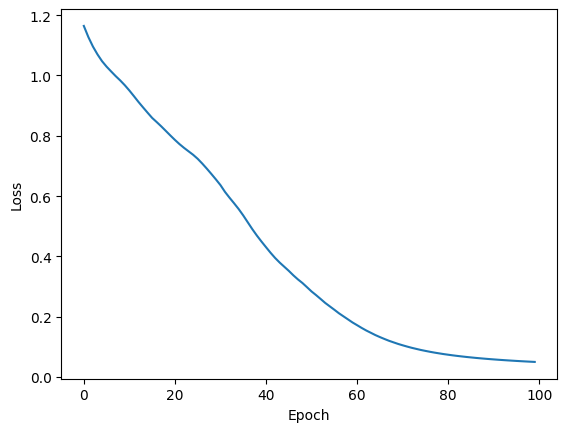

In [82]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [83]:
#Evalute Model on Test Data Set (validate model on test set)
with torch.no_grad(): #turn off back propagation
  y_eval = model.forward(X_test) #X_test are features,y_eval will be predictions
  loss = criterion(y_eval,y_test) # Find the loss


In [84]:
loss

tensor(0.1239)

In [88]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    #will tell us what type of flower the networks thinks it is
    print(f'{i+1}. {str(y_val)} {y_test[i]} {y_val.argmax().item()}')

    #correct or not
    if torch.argmax(y_val).item() == y_test[i]:
      correct += 1
print(f'we got correct {correct} out of {len(y_test)}')

1. tensor([-7.2063,  2.1612,  5.4769]) 2 2
2. tensor([-9.1754,  1.3635,  7.8524]) 2 2
3. tensor([-10.2001,   1.7588,   8.6470]) 2 2
4. tensor([-3.0953,  4.1606, -0.1988]) 1 1
5. tensor([-8.3845,  2.0174,  6.6467]) 2 2
6. tensor([-1.5475,  4.3179, -1.9503]) 1 1
7. tensor([-6.5539,  2.5202,  4.4807]) 2 2
8. tensor([-2.6112,  4.2436, -0.8124]) 1 1
9. tensor([-7.2923,  2.3135,  5.3310]) 2 2
10. tensor([-9.6277,  1.4424,  8.2337]) 2 2
11. tensor([-5.8210,  2.7769,  3.5191]) 2 2
12. tensor([  7.1417,   1.4121, -11.7486]) 0 0
13. tensor([  6.4062,   1.2480, -10.5262]) 0 0
14. tensor([-0.5721,  3.7056, -2.5105]) 1 1
15. tensor([  6.1274,   1.6891, -10.5167]) 0 0
16. tensor([-5.4546,  3.2498,  2.8626]) 2 1
17. tensor([  6.4498,   1.4771, -10.8144]) 0 0
18. tensor([-6.4638,  2.5415,  4.3899]) 1 2
19. tensor([  6.8152,   1.4108, -11.2762]) 0 0
20. tensor([ 5.1861,  1.5621, -8.9940]) 0 0
21. tensor([-1.0091,  4.0478, -2.2849]) 1 1
22. tensor([-9.2123,  1.6705,  7.6967]) 2 2
23. tensor([  6.3235,  